## Exploring Rossmann Drug Store Sales Data

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
data = pd.read_csv('../data/rossmann.csv')
print data.shape
data.head()

(1017209, 9)


/Library/Python/2.7/site-packages/pandas-0.14.1-py2.7-macosx-10.9-intel.egg/pandas/io/parsers.py:1139: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Because we are most interested in the `Date` column that contains the date of sales for each store, we will make sure to process that as a `DateTime` type, and make that the index of our dataframe.

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [7]:
# This allows us to easily filter by date.  For example, to a particular year:

data['2014'].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2014-12-31,1,3,2605,327,1,0,0,1,2014,12
2014-12-31,2,3,2269,252,1,0,0,1,2014,12
2014-12-31,3,3,3804,408,1,0,0,1,2014,12
2014-12-31,4,3,10152,1311,1,0,0,1,2014,12
2014-12-31,5,3,1830,217,1,0,0,1,2014,12


In [8]:
# We can also filter to a particular month:
data['2015-05'].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-05-31,1,7,0,0,0,0,0,0,2015,5
2015-05-31,2,7,0,0,0,0,0,0,2015,5
2015-05-31,3,7,0,0,0,0,0,0,2015,5
2015-05-31,4,7,0,0,0,0,0,0,2015,5
2015-05-31,5,7,0,0,0,0,0,0,2015,5


In [9]:
# Or day!
data['2015-07-02'].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-02,1,4,5558,573,1,1,0,0,2015,7
2015-07-02,2,4,6189,921,1,1,0,0,2015,7
2015-07-02,3,4,7450,701,1,1,0,1,2015,7
2015-07-02,4,4,10323,1333,1,1,0,0,2015,7
2015-07-02,5,4,6035,613,1,1,0,0,2015,7


In [10]:
# There are over a million sales data points in this dataset, so for some analysis we will focus on just one store.
store1_data = data[data.Store == 1]
store1_data.sort_index(inplace = True)
store1_data.head()

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  app.launch_new_instance()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1,2013,1
2013-01-02,1,3,5530,668,1,0,0,1,2013,1
2013-01-03,1,4,4327,578,1,0,0,1,2013,1
2013-01-04,1,5,4486,619,1,0,0,1,2013,1
2013-01-05,1,6,4997,635,1,0,0,1,2013,1


### Data Exploration and MINEing

To compare sales on holidays, we can compare the sales using box-plots, which allows us to compare the distribution of sales on holidays against all other days. On state holidays the store is closed (and as a nice sanity check there are 0 sales), and on school holidays the sales are relatively similar.

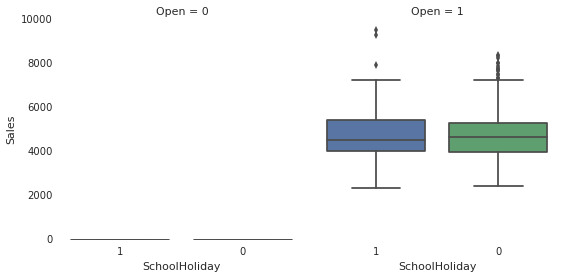

In [11]:
sns.factorplot(
    col='Open',
    x='SchoolHoliday',
    y='Sales',
    data=store1_data, 
    kind='box'
)

In [12]:
# See if there is a difference affecting sales on days of the week

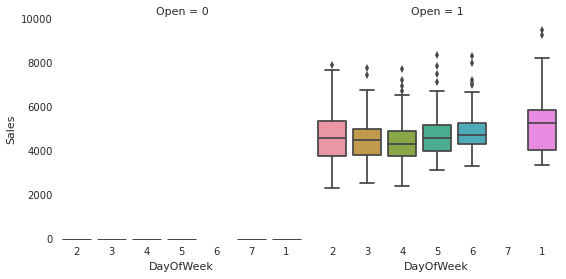

In [13]:
sns.factorplot(
    col='Open',
    x='DayOfWeek',
    y='Sales',
    data=store1_data,
    kind='box',
)

Lastly, we want to identify larger-scale trends in our data. How did sales change from 2014 to 2015? Were there any particularly interesting outliers in terms of sales or customer visits?

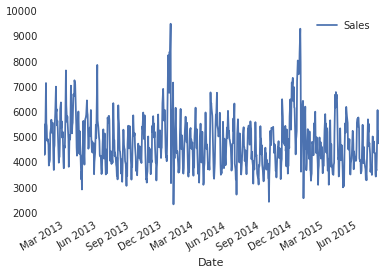

In [14]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].plot()

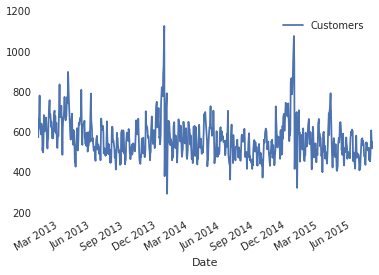

In [15]:
store1_open_data[['Customers']].plot()

### Data REFINING Using Time Series Statistics

### Autocorrelation

To measure how much the sales are correlated with each other, we want to compute the _autocorrelation_ of the 'Sales' column. In pandas, we do this we with the `autocorr` function.

`autocorr` takes one argument, the `lag` - which is how many prior data points should be used to compute the correlation. If we set the `lag` to 1, we compute the correlation between every point and the point directly preceding it, while setting `lag` to 10, computes the correlation between every point and the point 10 days earlier.


In [18]:
store1_data.Sales.autocorr(lag=1) # -0.12
store1_data.Sales.autocorr(lag=2) # -0.03

### Rolling Averages

If we want to investigate trends over time in sales, as always, we will start by computing simple aggregates.  We want to know what the mean and median sales were for each month and year.

In Pandas, this is performed using the `resample` command, which is very similar to the groupby function.  It allows us to group over different time periods.

We can use `data.resample` and provide as arguments:
    - The level on which to roll-up to, 'D' for day, 'W' for week, 'M' for month, 'A' for year
    - What aggregation to perform: 'mean', 'median', 'sum', etc.

In [19]:
data[['Sales']].resample('M', how=['median', 'mean']).head()

Sales             
            median         mean
Date                           
2013-01-31  5194.0  5211.555578
2013-02-28  5421.5  5494.371397
2013-03-31  5844.0  5820.349168
2013-04-30  5464.0  5483.749836
2013-05-31  5585.0  5364.127383

While identifying the monthly averages are useful, we often want to compare the sales data of a date to a smaller window. To understand holidays sales, we don't want to compare late December with the entire month, but perhaps a few days surrounding it. We can do this using rolling averages.

In pandas, we can compute rolling average using the `pd.rolling_mean` or `pd.rolling_median` functions.

In [20]:
pd.rolling_mean(data[['Sales']], window=3, center=True, freq='D').head()

,Sales
Date,
2013-01-01,NaN
2013-01-02,4004.475720
2013-01-03,5960.120478
2013-01-04,5661.694170
2013-01-05,3807.010762


`rolling_mean` (as well as `rolling_median`) takes these important parameters:
    - the first is the series to aggregate
    - `window` is the number of days to include in the average
    - `center` is whether the window should be centered on the date or use data prior to that date
    - `freq` is on what level to roll-up the averages to (as used in `resample`). Either `D` for day, `M` for month or `A` for year, etc.

Instead of plotting the full timeseries, we can plot the rolling mean instead, which smooths random changes in sales as well as removing outliers, helping us identify larger trends.

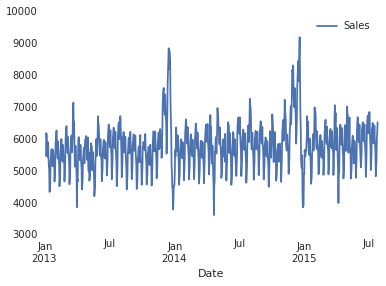

In [21]:
pd.rolling_mean(data[['Sales']], window=10, center=True, freq='D').plot()

### Pandas Window functions
Pandas `rolling_mean` and `rolling_median` are only two examples of Pandas window function capabilities. Window functions are operate on a set of N consecutive rows (a window) and produce an output.

In addition to `rolling_mean` and `rolling_median`, there are `rolling_sum`, `rolling_min`, `rolling_max`... and many more.

Another common one is `diff`, which takes the difference over time. `pd.diff` takes one arugment, `periods`, which is how many prio rows to use for the difference.


In [22]:
data['Sales'].diff(periods=1).head()

Date
2015-07-31     NaN
2015-07-31     801
2015-07-31    2250
2015-07-31    5681
2015-07-31   -9173
Name: Sales, dtype: float64

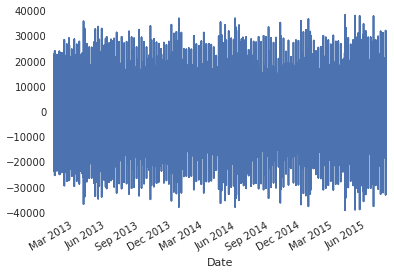

In [23]:
data['Sales'].diff(periods=1).plot()

In [26]:
average_daily_sales = data[['Sales', 'Open']].resample('D', how='mean')

In [2]:

print('Correlation with last day: {}'.format(average_daily_sales['Sales'].autocorr(lag=1)))
print('Correlation with last month: {}'.format(average_daily_sales['Sales'].autocorr(lag=30)))
print('Correlation with last year: {}'.format(average_daily_sales['Sales'].autocorr(lag=365)))
# We do see some minimal correlation in time, implying an AR model can be useful.  

# An easier way to diagnose this may be to plot many autocorrelations at once.

Correlation with last day: -0.0258582760064
Correlation with last month: -0.129842458225
Correlation with last year: 0.0202385294483


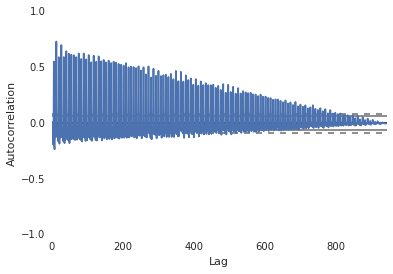

In [27]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(average_daily_sales.Sales)
# This shows a typical pattern of an autocorrelation plot, that it should decrease to 0 as lag increases.  
# However, it’s hard to observe exactly what the values are.
# Also there's a way better auto correlation plot in statsmodel :)


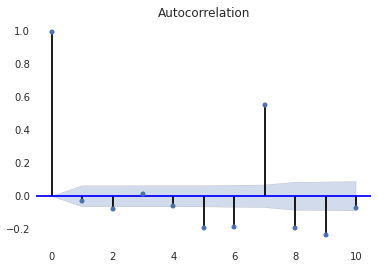

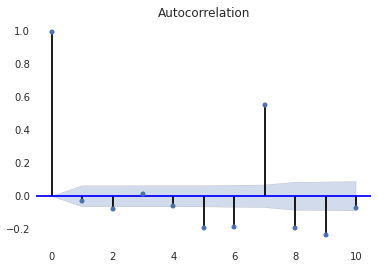

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(average_daily_sales.Sales, lags=10)

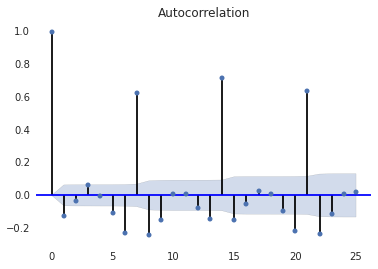

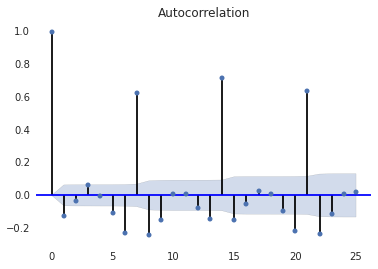

In [29]:
# Now that's pretty! Look at that big bump in 7. What could that mean?
# If we observed a handful of random distributed spikes, a moving average model would be useful.  

plot_acf(store1_data.Sales, lags=25)

# We can expand the window to 25 days to see that the random spikes occur regularly at 7 days.  What does this mean?


Remember, an ARMA model is a combination of autoregressive and moving average models.

We can train an AR model by turning off the MA component (q=0).


In [31]:
from statsmodels.tsa.arima_model import ARMA

store1_sales_data = store1_open_data[['Sales']].astype(float)
model = ARMA(store1_sales_data, (1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 0)   Log Likelihood               -6267.326
Method:                       css-mle   S.D. of innovations            739.079
Date:                Tue, 26 Apr 2016   AIC                          12540.651
Time:                        15:03:43   BIC                          12554.633
Sample:                    01-02-2013   HQIC                         12546.029
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4762.6741     82.986     57.392      0.000      4600.025  4925.323
ar.L1.Sales     0.6822      0.026     26.122      0.000         0.631     0.733
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4659           +0.0000j            1.4659            0.0000
-----------------------------------------------------------------------------
"""

In this case, we add an intercept of ~4700 to 0.68 times the previous month’s sales.  Note that the coefficient is not equal to the lag 1 autocorrelation.  This implies the data is **not** stationary.



## Residuals

Residuals are the errors of the model or how off our predictions are.

Ideally, we want randomly distributed errors that are small.

If the errors are large, our model does not perform well.

If the errors have a pattern, particularly over time, we may have overlooked something in the model or have periods of time that are different than the rest of the dataset.


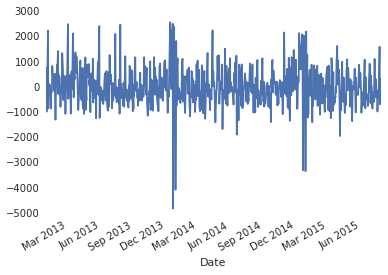

In [32]:
model.resid.plot()

# We have high (random) errors, meaning that a MR component might help

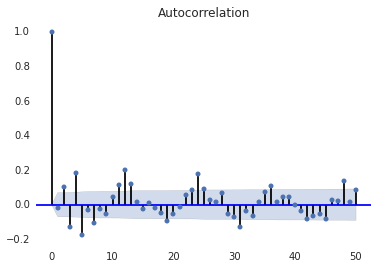

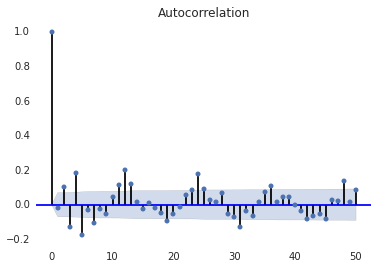

In [33]:
plot_acf(model.resid, lags=50)

In [34]:
# We can learn an AR(2) model, which regresses each sales value on the last two.
# In this case, we learn two coefficients, which tell us the effect of the last two sales values on the current sales.
# While this model may perform better, it may be more difficult to interpret.


model = ARMA(store1_sales_data, (2, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(2, 0)   Log Likelihood               -6267.032
Method:                       css-mle   S.D. of innovations            738.800
Date:                Tue, 26 Apr 2016   AIC                          12542.063
Time:                        15:03:50   BIC                          12560.705
Sample:                    01-02-2013   HQIC                         12549.233
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4763.0516     85.262     55.864      0.000      4595.941  4930.162
ar.L1.Sales     0.6634      0.036     18.537      0.000         0.593     0.734
ar.L2.Sales     0.0275      0.036      0.767      0.443        -0.043     0.098
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4235           +0.0000j            1.4235            0.0000
AR.2          -25.5901           +0.0000j           25.5901            0.5000
-----------------------------------------------------------------------------
"""

In [35]:
# Let's introduce the ARIMA model, which is exactly the same but has the ability to learn the diff

In [64]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [39]:
model = ARIMA(store1_sales_data, (1, 0, 1)).fit()
# the parameters are p, d, q
# So a ARIMA(1, 0, 1) is an ARMA(1, 1) which is AR(1) + MR(1)
# Basically this model is learning an autoregressive component and a moving average component
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 1)   Log Likelihood               -6267.111
Method:                       css-mle   S.D. of innovations            738.876
Date:                Tue, 26 Apr 2016   AIC                          12542.222
Time:                        15:05:04   BIC                          12560.865
Sample:                    01-02-2013   HQIC                         12549.392
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4762.5190     84.702     56.227      0.000      4596.507  4928.531
ar.L1.Sales     0.6979      0.035     20.095      0.000         0.630     0.766
ma.L1.Sales    -0.0294      0.045     -0.654      0.514        -0.118     0.059
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4328           +0.0000j            1.4328            0.0000
MA.1           34.0031           +0.0000j           34.0031            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# Note the P value of the MA value is very high!

In [55]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(store1_sales_data, (1, 0, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 0)   Log Likelihood               -6267.326
Method:                       css-mle   S.D. of innovations            739.079
Date:                Tue, 26 Apr 2016   AIC                          12540.651
Time:                        15:16:01   BIC                          12554.633
Sample:                    01-02-2013   HQIC                         12546.029
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4762.6741     82.986     57.392      0.000      4600.025  4925.323
ar.L1.Sales     0.6822      0.026     26.122      0.000         0.631     0.733
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4659           +0.0000j            1.4659            0.0000
-----------------------------------------------------------------------------
"""

In [170]:
model = ARIMA(store1_sales_data, (1, 1, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6261.011
Method:                       css-mle   S.D. of innovations            738.624
Date:                Tue, 26 Apr 2016   AIC                          12530.022
Time:                        08:46:03   BIC                          12548.659
Sample:                    07-30-2015   HQIC                         12537.190
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.5108      0.364      1.405      0.160        -0.202     1.223
ar.L1.D.Sales     0.6801      0.026     25.801      0.000         0.628     0.732
ma.L1.D.Sales    -1.0000      0.004   -240.410      0.000        -1.008    -0.992
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4703           +0.0000j            1.4703            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [171]:
model = ARIMA(store1_sales_data, (1, 1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6313.616
Method:                       css-mle   S.D. of innovations            792.680
Date:                Tue, 26 Apr 2016   AIC                          12633.233
Time:                        08:46:03   BIC                          12647.211
Sample:                    07-30-2015   HQIC                         12638.609
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.1722     24.027      0.007      0.994       -46.921    47.265
ar.L1.D.Sales    -0.1815      0.035     -5.150      0.000        -0.251    -0.112
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.5100           +0.0000j            5.5100            0.5000
-----------------------------------------------------------------------------
"""

With our models, we can also plot our predictions against the true series using the plot_predict function.

We can compare the last 50 days of true values against our predictions.

The function takes two arguments, the start and end index of the dataframe to plot.  

Here, we are plotting the last 50 values.


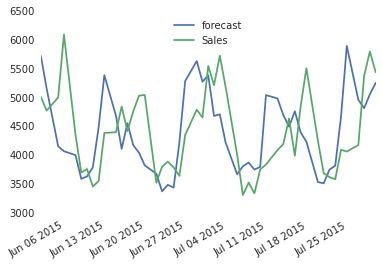

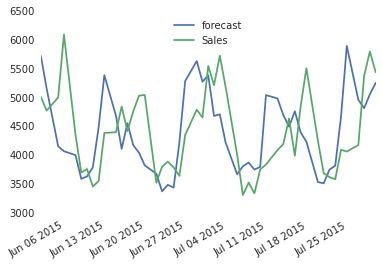

In [174]:
model.plot_predict(1, 50)

To plot earlier values with our predictions continuing where the true values stop, we can do the following.

This plots true values in 2014 and our predictions 200 days out from 2014.


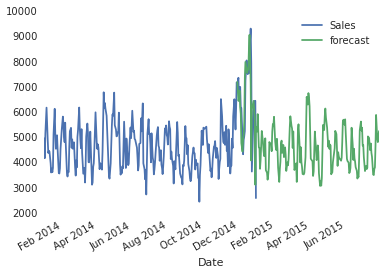

In [175]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = store1_sales_data['2014'].plot(ax=ax)

fig = model.plot_predict(1, 200, ax=ax, plot_insample=False)


The two previous problems remain:

Large errors around the holiday period

Errors with high autocorrelation

We can adjust the AR component of the model to adjust for a piece of this.  Let’s increase the lag to 7.

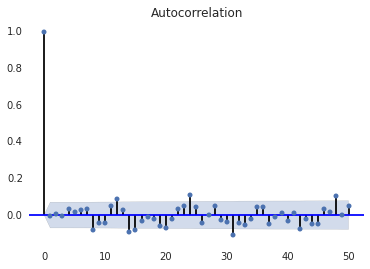

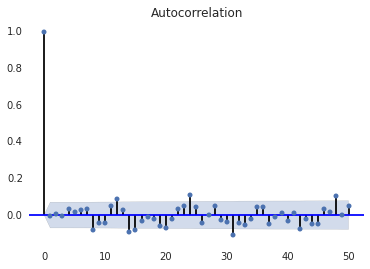

In [176]:
model = ARIMA(store1_sales_data, (7, 1, 2)).fit()
model.summary()

plot_acf(model.resid, lags=50)

This removes some of the autocorrelation in the residuals but large discrepancies still exist.

However, they exist where we are breaking our model assumptions.


In [42]:
# Let's use some metrics to really evaluate our performance
# Make our training and test data

n = len(store1_data.Sales)
train = store1_data.Sales[:int(.75*n)]
test = store1_data.Sales[int(.75*n):]
print min(test.index), max(test.index)

2014-12-08 00:00:00 2015-07-31 00:00:00


In [65]:
model = ARIMA(train, (1, 0, 0)).fit()
predictions = model.predict('2014-12-08', '2015-07-31', test)
print "Mean absolute error: ", mean_absolute_error(test, predictions)
print "R Squared: ", r2_score(test, predictions)

Mean absolute error:  1478.60669156
R Squared:  -0.00174214302949


In [66]:
# change AR to 7 to capture better weekly trend
model = ARIMA(train, (7, 0, 1)).fit()
predictions = model.predict('2014-12-08', '2015-07-31', test)
print "Mean absolute error: ", mean_absolute_error(test, predictions)
print "R Squared: ", r2_score(test, predictions)

Mean absolute error:  1375.66003536
R Squared:  0.122092024865


In [67]:
# Add in the d coefficient, doesn't help!
model = ARIMA(train, (7, 1, 1)).fit()
predictions = model.predict('2014-12-08', '2015-07-31', test, typ='levels')
print "Mean absolute error: ", mean_absolute_error(test, predictions)
print "R Squared: ", r2_score(test, predictions)
# Note I added a new parameter, typ levels, 
# What is different about the d paramter that I might need to add this?
# Think what the ARIMA is predicting rather than the ARMA models

Mean absolute error:  1998.155514
R Squared:  -0.645893263167


/Library/Python/2.7/site-packages/statsmodels-0.6.0-py2.7-macosx-10.9-intel.egg/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [68]:
# Change MR to 2, helps!
model = ARIMA(train, (7, 0, 2)).fit()
predictions = model.predict('2014-12-08', '2015-07-31', test)
print "Mean absolute error: ", mean_absolute_error(test, predictions)
print "R Squared: ", r2_score(test, predictions)

Mean absolute error:  1369.39547733
R Squared:  0.158067361334


/Library/Python/2.7/site-packages/statsmodels-0.6.0-py2.7-macosx-10.9-intel.egg/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [70]:
# Change MR to 2, helps!
model = ARIMA(train, (7, 0, 4)).fit()
predictions = model.predict('2014-12-08', '2015-07-31', test)
print "Mean absolute error: ", mean_absolute_error(test, predictions)
print "R Squared: ", r2_score(test, predictions)
# Our best model so far!

Mean absolute error:  1368.32910889
R Squared:  0.267243083166


/Library/Python/2.7/site-packages/statsmodels-0.6.0-py2.7-macosx-10.9-intel.egg/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
# Note some values of R^2 are negative, from the documantion:
# Unlike most other scores, R^2 score may be negative (it need not actually be the square of a quantity R).
